In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [59]:
df=pd.read_csv(r"D:\Cases\Glass_Identification\Glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows_float_processed


In [60]:
x=df.drop('Type',axis=1)
y=df['Type']
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.30,random_state=25,stratify=y)

In [61]:
def knn(max_value,x_train,y_train,x_test,y_test):
    k=[x for x in range(1,max_value)]
    scores=[]
    for neighbors in k:
        model=KNeighborsClassifier(n_neighbors=neighbors)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        scores.append([neighbors,accuracy_score(y_test,y_pred)])

    df_scores=pd.DataFrame(data=scores,columns=['K-values','accuracy_scores'])
    return df_scores

In [62]:
df_scores=knn(10,X_train,y_train,X_test,y_test)
df_scores.sort_values(by='accuracy_scores',ascending=False)

,K-values,accuracy_scores
0,1,0.753846
1,2,0.753846
2,3,0.723077
3,4,0.723077
4,5,0.723077
5,6,0.723077
7,8,0.707692
6,7,0.692308
8,9,0.692308


In [67]:
scaler=StandardScaler()
X_scaled_train=scaler.fit_transform(X_train)
X_scaled_test=scaler.fit_transform(X_test)

In [68]:
df_scores=knn(10,X_scaled_train,y_train,X_scaled_test,y_test)
df_scores.sort_values(by='accuracy_scores',ascending=False)

,K-values,accuracy_scores
2,3,0.692308
3,4,0.661538
0,1,0.630769
6,7,0.630769
4,5,0.615385
8,9,0.615385
1,2,0.600000
5,6,0.600000
7,8,0.600000


In [3]:
from sklearn.metrics import roc_auc_score,roc_curve

In [2]:
df=pd.read_csv(r"D:\Datasets\comp_prob.csv")
df

,y_test,yprob_1,yprob_2
0,1,0.6,0.70
1,1,0.4,0.45
2,0,0.8,0.90
3,0,0.2,0.20
4,0,0.3,0.15
5,1,0.6,0.70
6,0,0.3,0.30
7,0,0.8,0.60
8,1,0.6,0.70
9,0,0.3,0.20


In [4]:
y_pred_probs1=df['yprob_1']
y_pred_probs2=df["yprob_2"]
y_test=df['y_test']


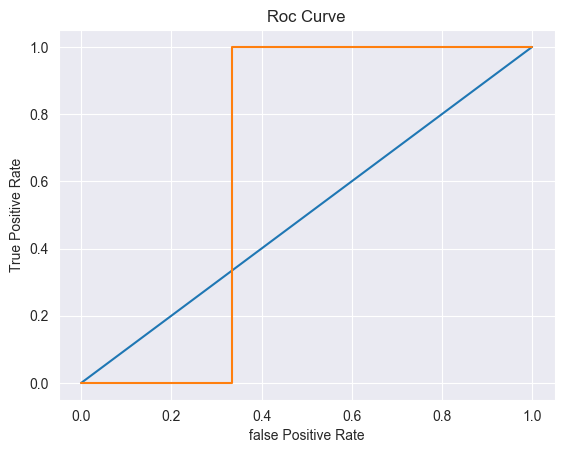

In [5]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_probs1)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel("false Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Roc Curve")
plt.show()

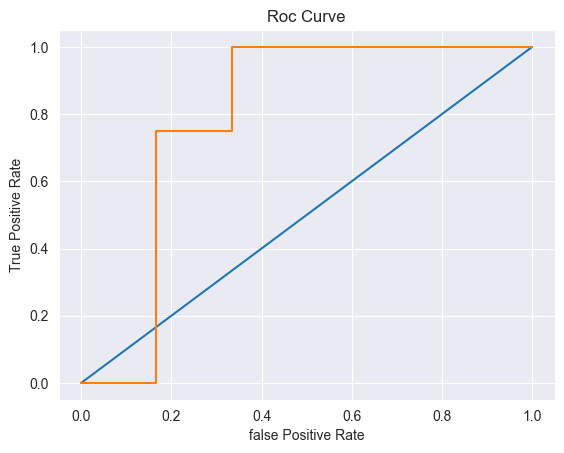

In [6]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_probs2)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel("false Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Roc Curve")
plt.show()

In [22]:
df=pd.read_csv(r"D:\HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0,support,low
14991,0.37,0.48,2,160,3,0,1,0,support,low
14992,0.37,0.53,2,143,3,0,1,0,support,low
14993,0.11,0.96,6,280,4,0,1,0,support,low


In [23]:
x=df.drop('left',axis=1)
y=df['left']

In [24]:
x=pd.get_dummies(x,drop_first=True)

In [25]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.30)

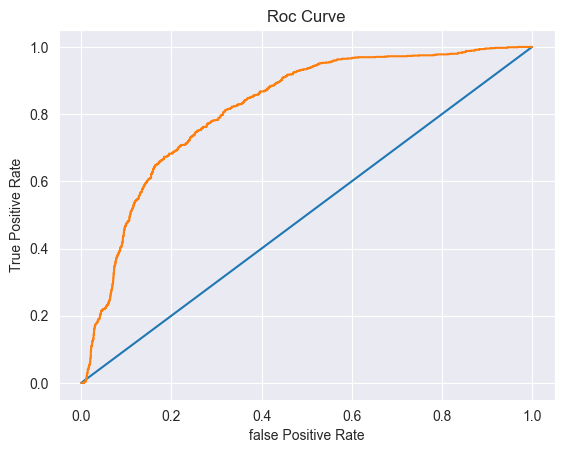

0.8175129721707668

In [26]:
model=LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)
y_pred=model.predict_proba(X_test)
fpr,tpr,thresholds=roc_curve(y_test,y_pred[:,1])
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel("false Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Roc Curve")
plt.show()
roc_auc_score(y_test,y_pred[:,1])

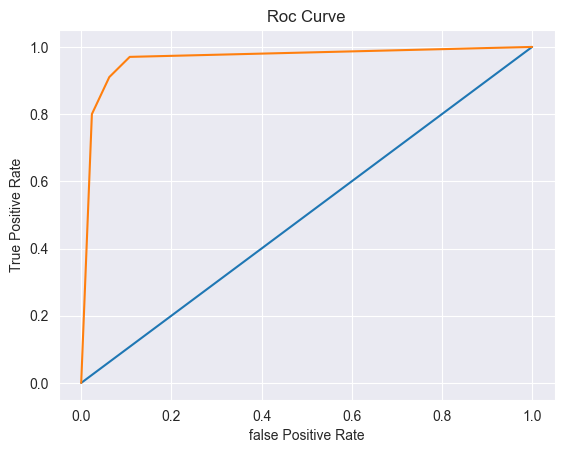

0.9642630236261414

In [28]:
model=KNeighborsClassifier(3)
model.fit(X_train,y_train)
y_pred=model.predict_proba(X_test)
fpr,tpr,thresholds=roc_curve(y_test,y_pred[:,1])
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel("false Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Roc Curve")
plt.show()
roc_auc_score(y_test,y_pred[:,1])